## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

plt.style.use(plt.style.available[11])

np.random.seed(1)

## Create Banner

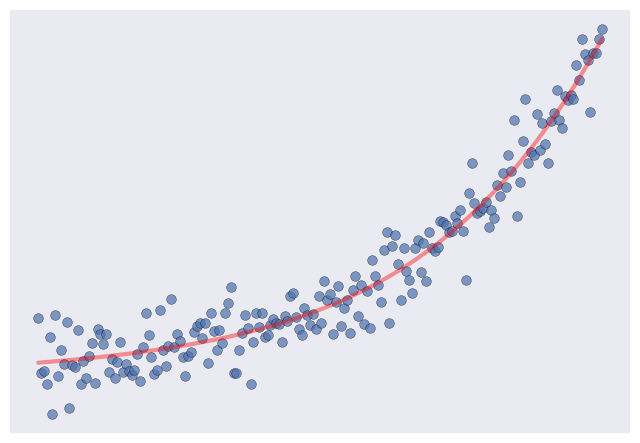

In [2]:
N = 200
x = np.linspace(0, 1, N)
y = 2*x**4 + x**3 + 2*x**2 + np.random.randn(N)*.4
plt.scatter(x, y, alpha=.7, edgecolors='k')

x_poly = PolynomialFeatures(4, include_bias=True).fit_transform(x.reshape(-1, 1))
reg = LinearRegression()
reg.fit(x_poly, y.reshape(-1, 1))

x_vals = np.linspace(min(x), max(x), N).reshape(-1, 1)
y_vals = reg.predict(x_poly)

plt.plot(x_vals, y_vals, 'r', alpha=.4, linewidth=3)

# plt.plot([-.05, -.05], [-3, max(y)], 'k', alpha=.5)
# plt.plot([-.1, max(x)], [-2.5, -2.5], 'k', alpha=.5)

plt.xticks([])
plt.yticks([])

plt.show()


## Linear Regression

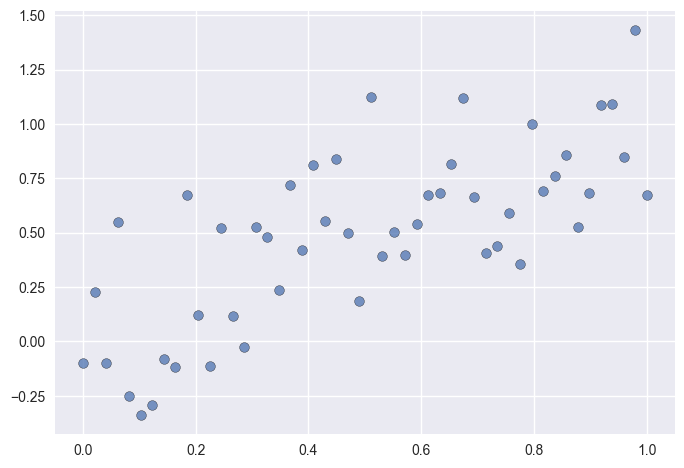

In [3]:
N = 50
x = np.linspace(0, 1, N)
y = x + np.random.randn(N)/4

plt.scatter(x, y, alpha=.75, edgecolors='k')
plt.show()


## Least Squares

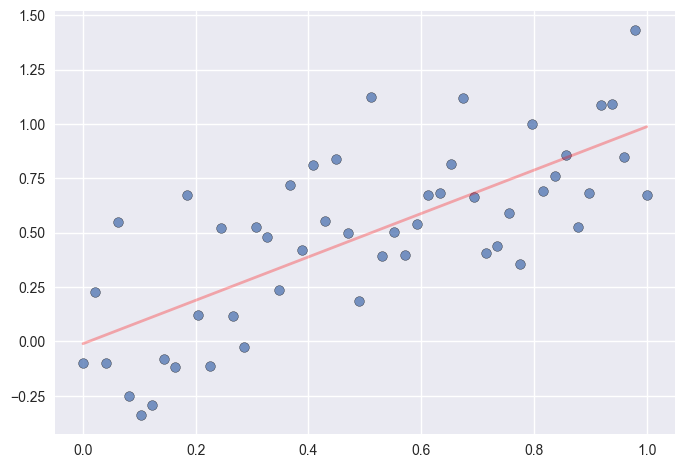

In [4]:
X = np.vstack((np.ones(len(x)), x)).T
betas = np.linalg.inv(X.T@X) @ X.T @ y
yHat = X@betas
yHat.shape

plt.plot(x, yHat, 'r', alpha=.3, linewidth=2)
plt.scatter(x, y, alpha=.75, edgecolors='k')
plt.show()


## Failure case for Linear Regression

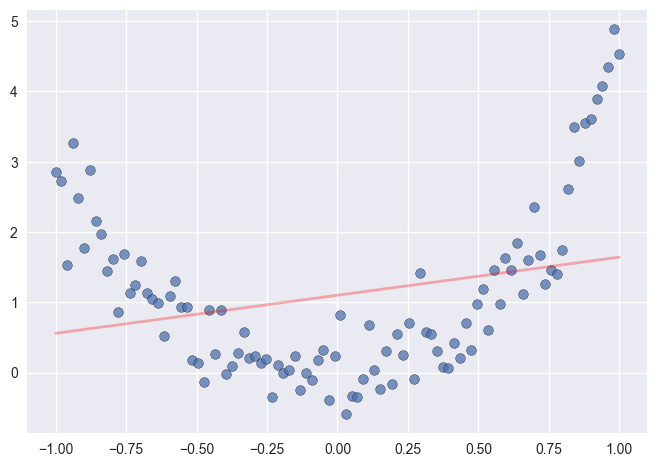

In [5]:
N = 100
x = np.linspace(-1, 1, N)
y = 2*x**4 + x**3 + 2*x**2 + np.random.randn(N)*.4

X = np.vstack((np.ones(len(x)), x)).T

betas = np.linalg.inv(X.T@X) @ X.T @ y

yHat = X@betas

plt.plot(x, yHat, 'r', alpha=.3, linewidth=2)
plt.scatter(x, y, alpha=.75, edgecolors='k')
plt.show()


## Polynomial Regression

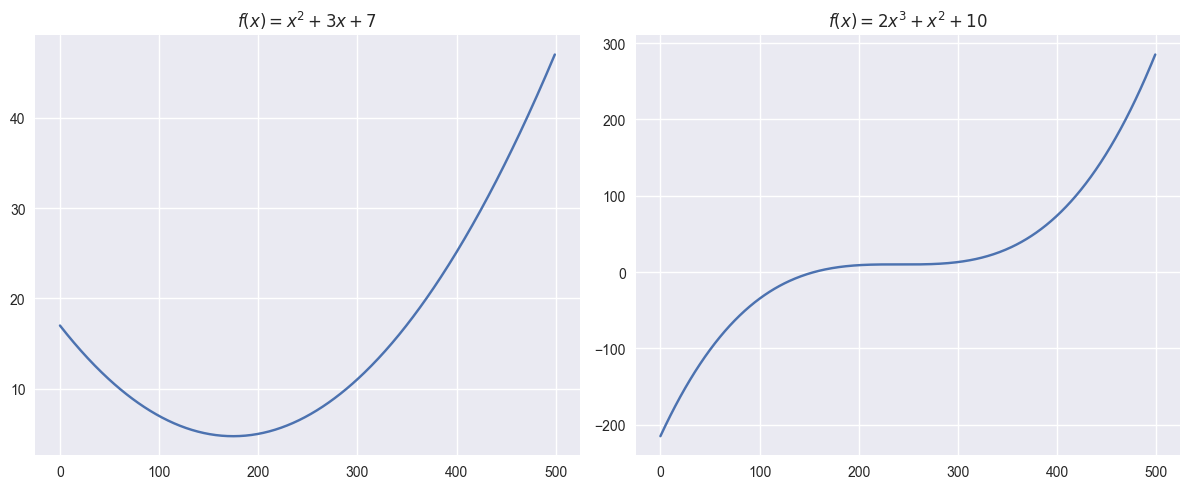

In [6]:
plt.figure(figsize=(12, 5))

N = 500
x = np.linspace(-5, 5, N)

y1 = x**2 + 3*x + 7
y2 = 2*x**3 + x**2 + 10

plt.subplot(121)
plt.plot(y1)
plt.title('$f(x) = x^2 + 3x + 7$')

plt.subplot(122)
plt.plot(y2)
plt.title('$f(x) = 2x^3 + x^2 + 10$')

plt.tight_layout()
plt.show()


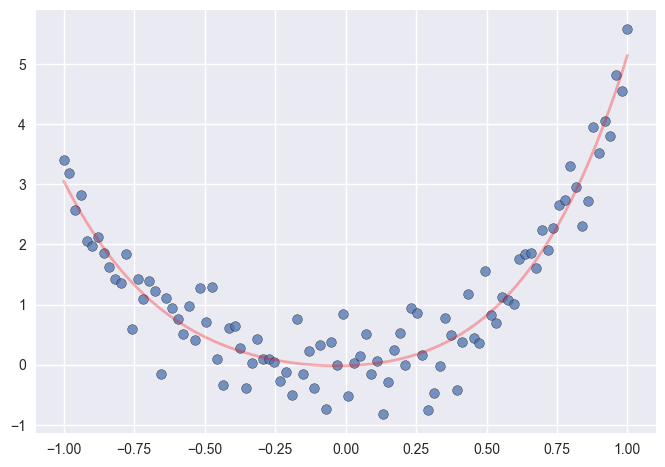

In [7]:
def polynomial_features(X, order=2):
    if order < 2:
        return X

    output = np.array(X**1)

    # here we starts with 2 is becuase the first column is already calculated above
    for d in range(2, order + 1):
        output = np.hstack((output, X**d))

    return output

N = 100
x = np.linspace(-1, 1, N)
y = 2*x**4 + x**3 + 2*x**2 + np.random.randn(N)*.4
x = x.reshape(-1, 1)

X_poly = polynomial_features(x, order=4)
'''or use sklearn as shown below'''
# poly_feat = PolynomialFeatures(degree=4, include_bias=False)
# X_poly = poly_feat.fit_transform(x)

# add the np.ones to incorporate the intercept term
X_poly = np.hstack((X_poly, np.ones((len(X_poly), 1))))

# calculate the beta values
betas = np.linalg.inv(X_poly.T@X_poly) @ X_poly.T @ y
yHat = X_poly@betas

plt.plot(x, yHat, 'r', alpha=.3, linewidth=2)
plt.scatter(x, y, alpha=.75, edgecolors='k')
plt.show()

## How to choose the correct degree/order ?

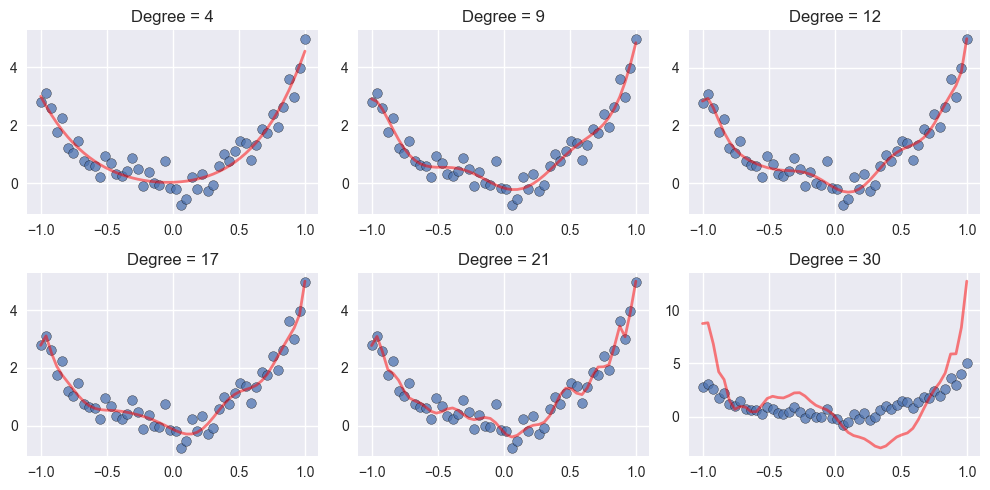

In [8]:
N = 50
x = np.linspace(-1, 1, N)
y = 2*x**4 + x**3 + 2*x**2 + np.random.randn(N)*.4
x = x.reshape(-1, 1)

fig, axes = plt.subplots(2, 3, figsize=(10, 5))
axes = axes.flatten()

for i, d in enumerate([4, 9, 12, 17, 21, 30]):
    poly_feat = PolynomialFeatures(degree=d, include_bias=False)
    X_poly = poly_feat.fit_transform(x)

    # add the np.ones to incorporate the intercept term
    X_poly = np.hstack((X_poly, np.ones((len(X_poly), 1))))

    # calculate the beta values
    betas = np.linalg.inv(X_poly.T@X_poly) @ X_poly.T @ y
    yHat = X_poly@betas

    axes[i].plot(x, yHat, 'r', alpha=.5, linewidth=2)
    axes[i].scatter(x, y, alpha=.75, edgecolors='k')
    axes[i].set_title(f'Degree = {d}')

plt.tight_layout()
plt.show()


## Bayes Information Criteria (BIC)

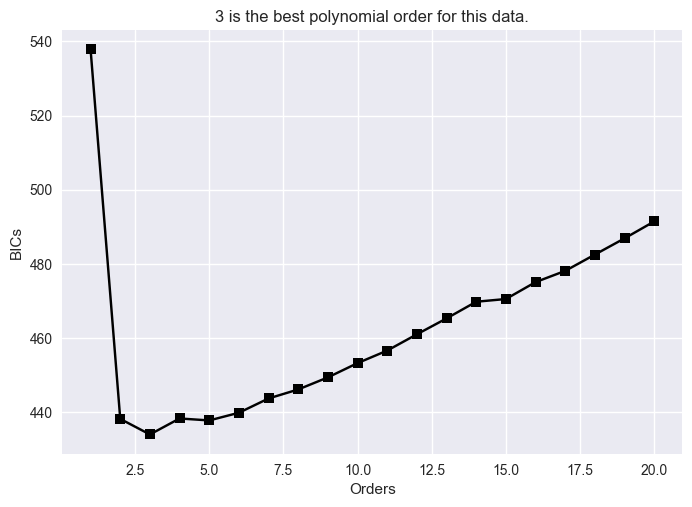

In [9]:
N = 100
x = np.linspace(-1, 1, N)
y = 2*x**4 + x**3 + 2*x**2 + np.random.randn(N)*.8
x = x.reshape(-1, 1)

def get_bic(x, y, order):
    poly_feat = PolynomialFeatures(degree=order, include_bias=True)
    X_poly = poly_feat.fit_transform(x)
    
    betas = np.linalg.inv(X_poly.T@X_poly) @ X_poly.T @ y
    yHat = X_poly@betas
    
    sse = sum((y-yHat) ** 2)
    n = len(y)
    bic = n*np.log(sse) + order*np.log(n)
    return bic

orders = np.arange(1, 21)
bic = [get_bic(x, y, o) for o in orders]
BEST_ORDER = orders[np.argmin(bic)]

plt.plot(orders, bic, 'ks-')
plt.xlabel('Orders')
plt.ylabel('BICs')
plt.title(f'{BEST_ORDER} is the best polynomial order for this data.')
plt.show()


## Linear Regression Model

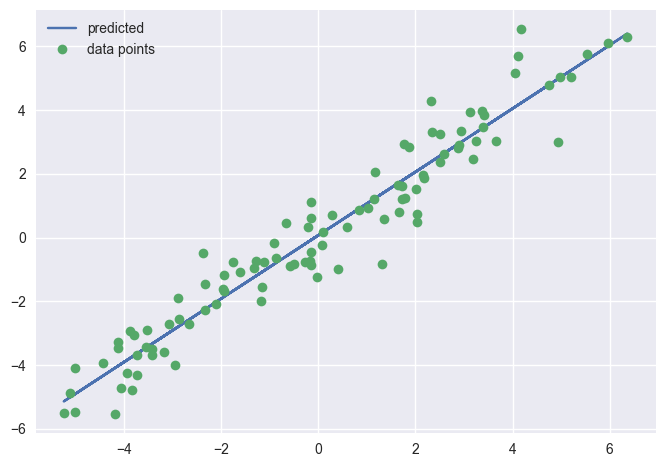

In [73]:
class LinearRegression:
    def __init__(self, lr=0.001, n_epoch=1000):
        self.lr = lr
        self.n_epoch = n_epoch
        self.weights = None  # slope
        self.bias = None  # y_intercept

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.random.randn(n_features)
        self.bias = 0

        for _ in range(self.n_epoch):
            y_predicted = np.dot(X, self.weights) + self.bias

            dw = (2/n_samples) * X.T @ (y_predicted - y)
            db = (2/n_samples) * np.sum(y_predicted - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        y_predicted = X @ self.weights + self.bias
        return y_predicted

N = 100
X = (np.linspace(-5, 5, N) + np.random.randn(N)*.6).reshape(-1, 1)
y = X[:, 0] + np.random.randn(N)


model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

plt.plot(X[:, 0], y_pred, label='predicted')
plt.plot(X[:, 0], y, 'o', label='data points')
plt.legend()
plt.show()


In [74]:
model.weights, model.bias


(array([0.99415698]), 0.06953988553360202)

## Working with scikit-learn

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets

# create data
X, y = datasets.make_regression(
    n_samples=100, n_features=2, noise=20
)

# split for test & train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression() # init model
model.fit(X_train, y_train) # train model
y_pred = model.predict(X_test) # predict
